In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import cufflinks as cf
from IPython.display import display, HTML
import plotly.express as pex
from sklearn.model_selection import train_test_split
from sklearn import metrics
cf.set_config_file( sharing= "public", theme="space", offline = True)

In [2]:
df = pd.read_csv("train.csv")

# VISUALIZACION DE DATOS

In [3]:
cormat = df.corr()
cormat = cormat.nlargest(11, "SalePrice")
cormat_s = cormat["SalePrice"]
graficas = df.filter(items=[
    "OverallQual",
    "FullBath",
    "GrLivArea",
    "GarageArea",
    "TotalBsmtSF",
    "1stFlrSF",
    "TotRmsAbvGrd ",
    "YearBuilt",
    "YearRemodAdd",
    "SalePrice"
])
cormat_s


SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

In [4]:
graficas

,OverallQual,FullBath,GrLivArea,GarageArea,TotalBsmtSF,1stFlrSF,YearBuilt,YearRemodAdd,SalePrice
0,7,2,1710,548,856,856,2003,2003,208500
1,6,2,1262,460,1262,1262,1976,1976,181500
2,7,2,1786,608,920,920,2001,2002,223500
3,7,1,1717,642,756,961,1915,1970,140000
4,8,2,2198,836,1145,1145,2000,2000,250000
...,...,...,...,...,...,...,...,...,...
1455,6,2,1647,460,953,953,1999,2000,175000
1456,6,2,2073,500,1542,2073,1978,1988,210000
1457,7,2,2340,252,1152,1188,1941,2006,266500
1458,5,1,1078,240,1078,1078,1950,1996,142125


In [5]:
graficas.columns[6:8]

Index(['YearBuilt', 'YearRemodAdd'], dtype='object')

In [6]:
pex.box(graficas, x="OverallQual", y = "SalePrice", color = "OverallQual")

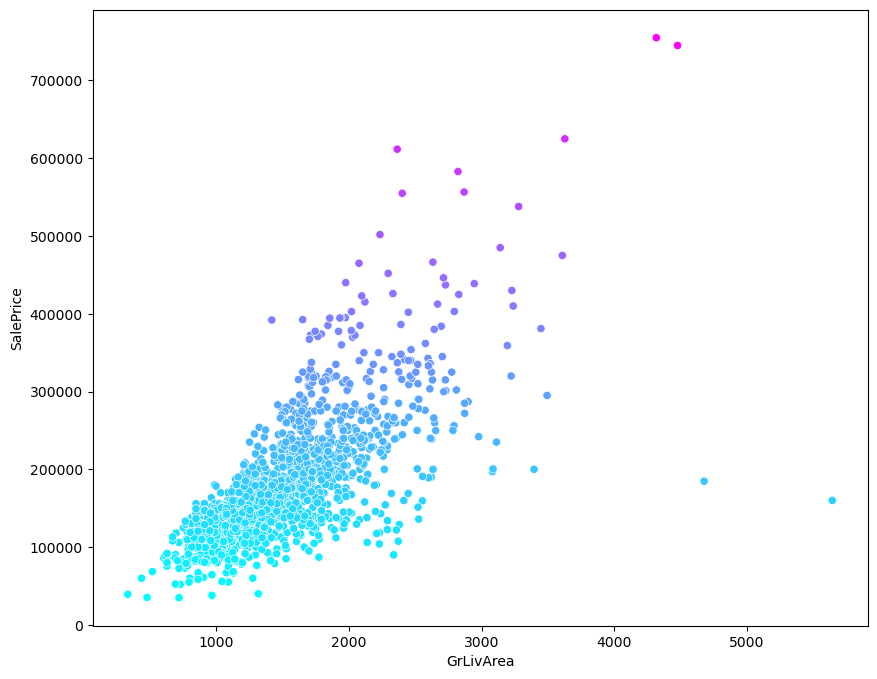

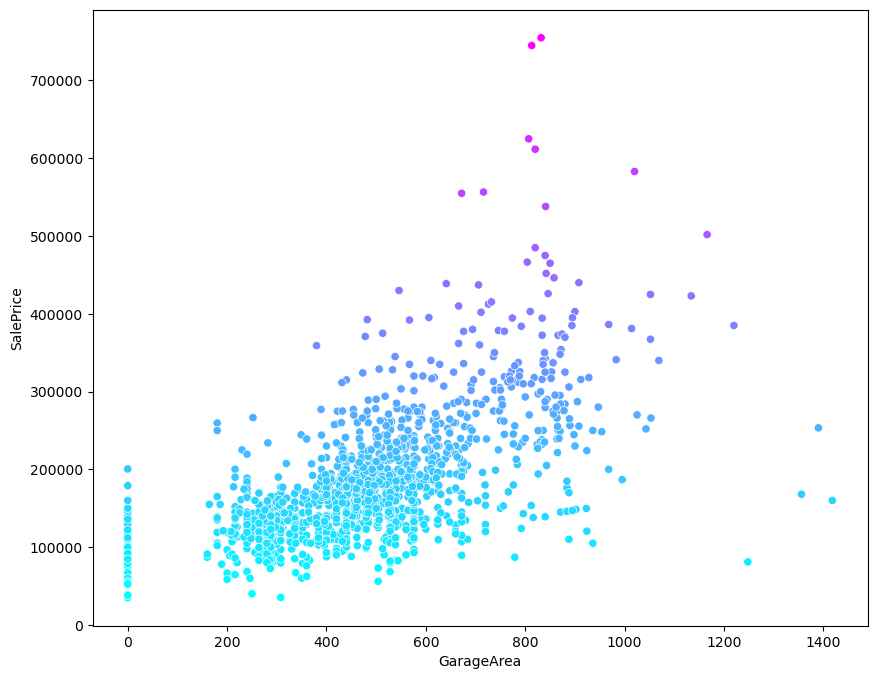

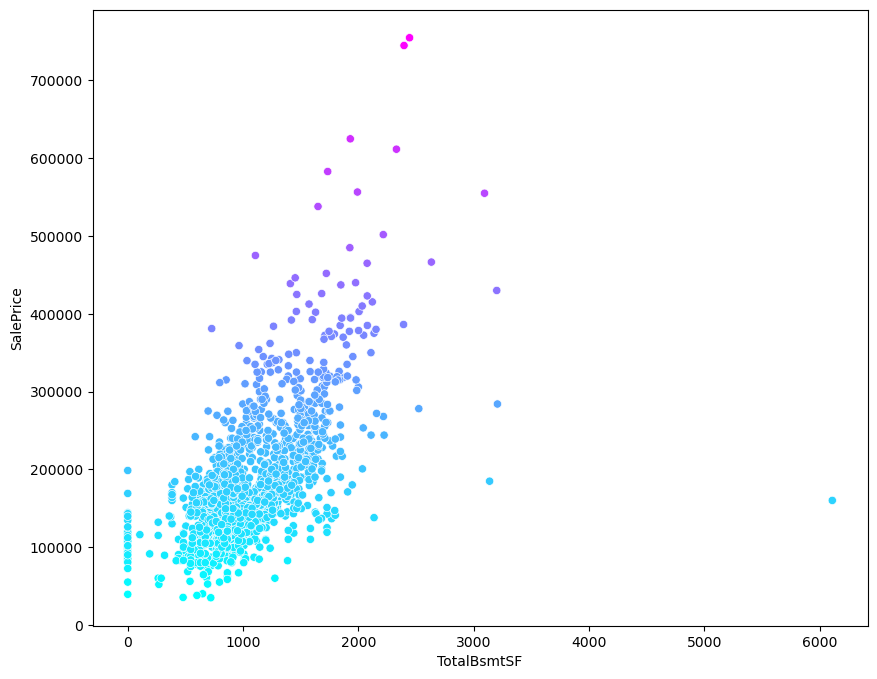

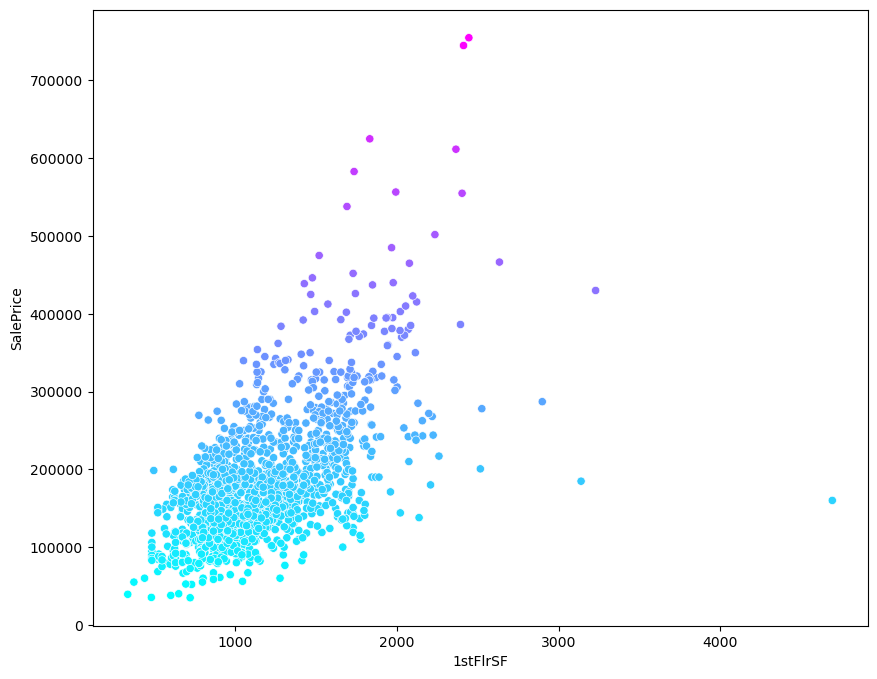

In [7]:
for columna in graficas.columns[2:6]:
    fig = plt.figure(figsize=(10,8))
    axes = sns.scatterplot(x=columna, y="SalePrice", data = graficas, hue = "SalePrice", legend=False, palette="cool")

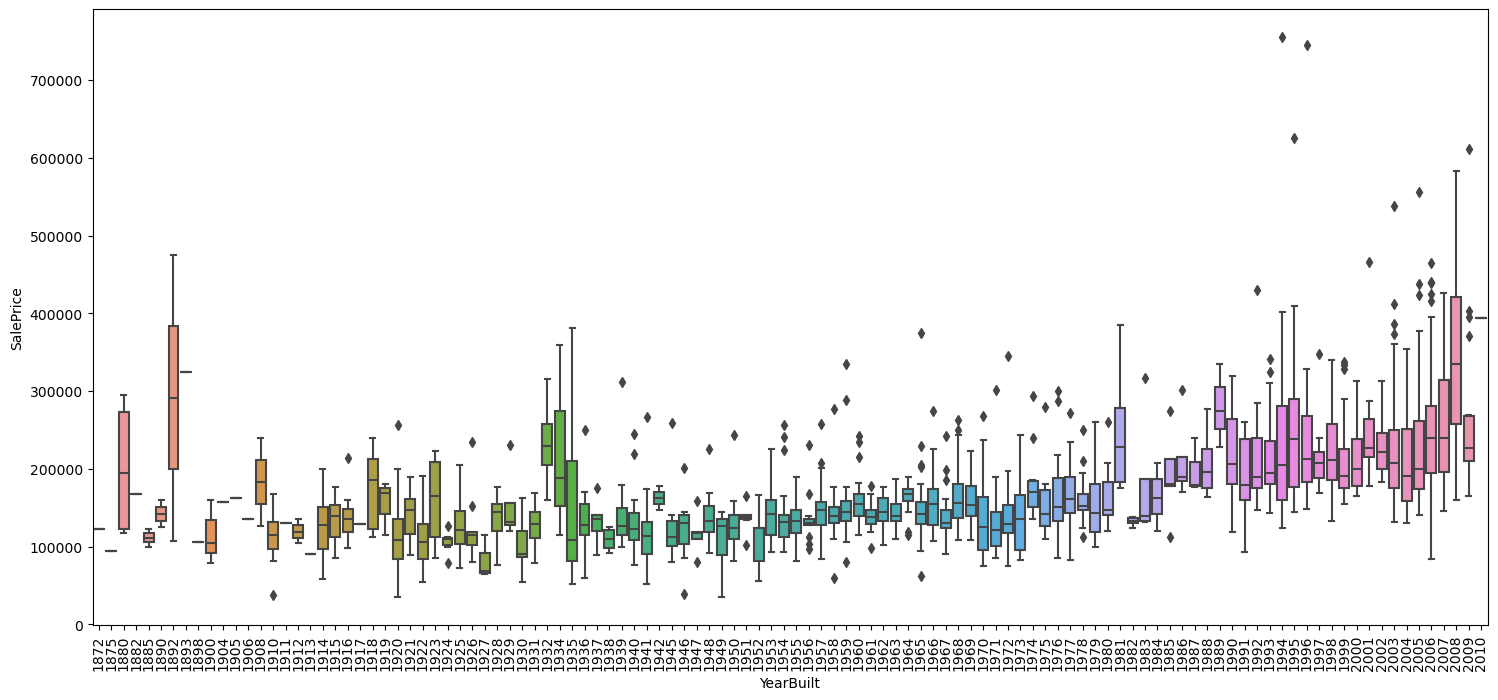

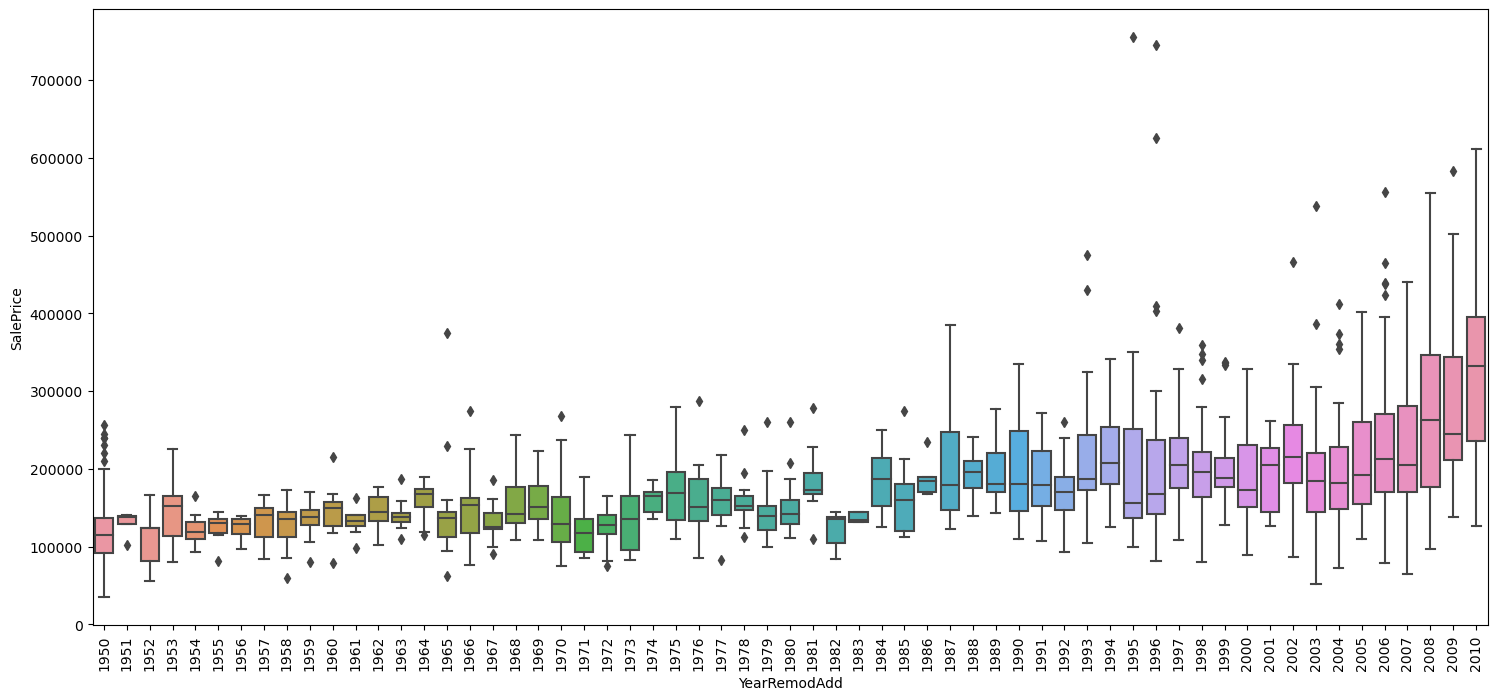

In [8]:
for column in graficas.columns[6:8]:
    fig = plt.figure(figsize=(18,8))
    axes = sns.boxplot(x=column, y="SalePrice", data = graficas)
    plt.xticks(rotation=90)

In [9]:
graficas

,OverallQual,FullBath,GrLivArea,GarageArea,TotalBsmtSF,1stFlrSF,YearBuilt,YearRemodAdd,SalePrice
0,7,2,1710,548,856,856,2003,2003,208500
1,6,2,1262,460,1262,1262,1976,1976,181500
2,7,2,1786,608,920,920,2001,2002,223500
3,7,1,1717,642,756,961,1915,1970,140000
4,8,2,2198,836,1145,1145,2000,2000,250000
...,...,...,...,...,...,...,...,...,...
1455,6,2,1647,460,953,953,1999,2000,175000
1456,6,2,2073,500,1542,2073,1978,1988,210000
1457,7,2,2340,252,1152,1188,1941,2006,266500
1458,5,1,1078,240,1078,1078,1950,1996,142125


In [10]:
data = np.array(graficas.drop("SalePrice", axis=1, inplace=False))

In [11]:
target = np.array(graficas["SalePrice"])

In [12]:
X_train ,X_test ,y_train ,y_test = train_test_split(data, target)

In [13]:
data.shape

(1460, 8)

In [14]:
target.shape

(1460,)

# Red Neuronal

In [15]:
#Capas del Modelo
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1460, input_shape=([8])),
    tf.keras.layers.Dense(units=64, activation = "relu"),
    tf.keras.layers.Dense(units=64, activation = "relu"),
    tf.keras.layers.Dense(units=64, activation = "relu"),
    tf.keras.layers.Dense(units=1)
])

#Compilar el modelo

model.compile(
    optimizer= "adam",
    loss = "mean_squared_error"
)



In [16]:
entrenamiento = model.fit(X_train, y_train, epochs=1000, verbose=False)

In [17]:
prediccion = model.predict(X_test)

12/12 [==============================] - 0s 1ms/step


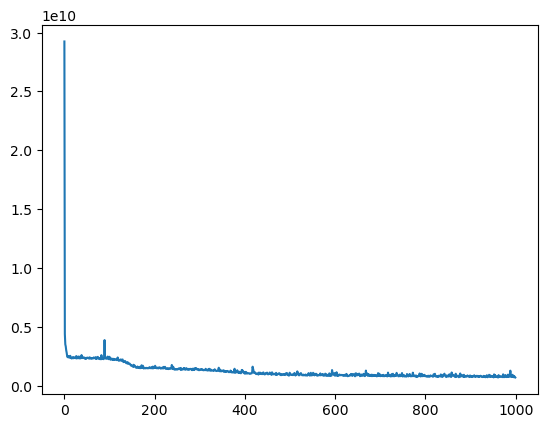

In [18]:
plt.plot(entrenamiento.history["loss"])

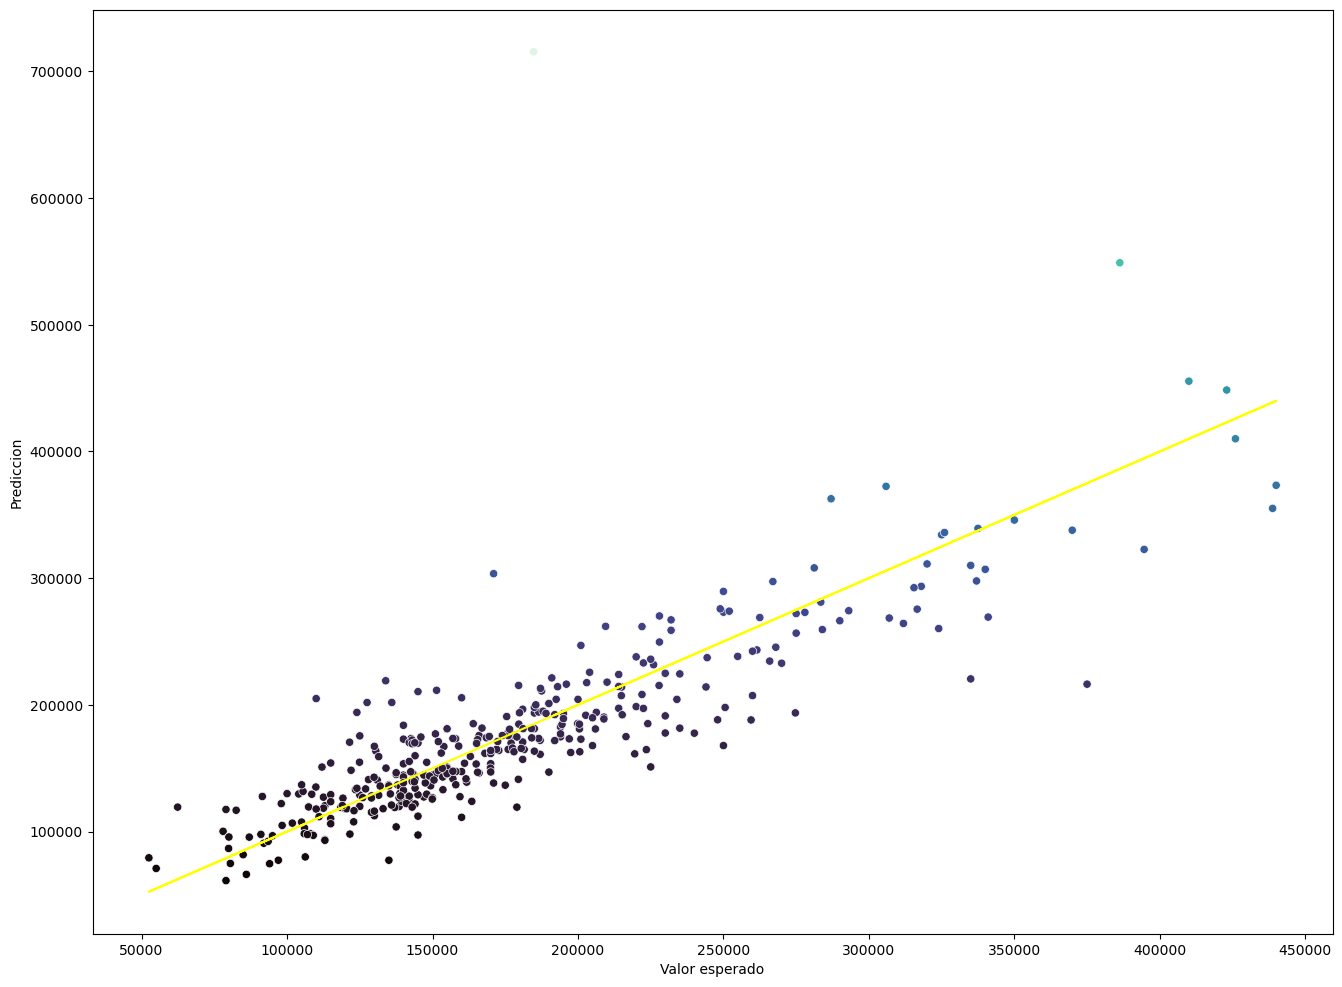

In [38]:
reglin = pd.DataFrame()
prediccion = prediccion.reshape(365)
y_test = y_test.reshape(365)
reglin["Prediccion"] = pd.Series(prediccion)
reglin["Valor esperado"] = pd.Series(y_test)
fig = plt.figure(figsize=(16,12))
axes = sns.scatterplot(data=reglin, x="Valor esperado", y = "Prediccion", palette="mako", legend=False, hue="Prediccion")
_= plt.plot(y_test, y_test, color= "yellow")



In [20]:
apuesta = model.predict(np.array([[7,2,1710,548,856, 756, 2003, 2003]]))

1/1 [==============================] - 0s 56ms/step


In [21]:
print(f"{apuesta[0][0]:.2f}$ ")

210536.42$ 
